In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import re

0a)

0b)

In [3]:
with open('TamingoftheShrew.txt') as f:
    chars = f.read()

In [4]:
chars[:1000]

"\n\n\n\n                        The Taming of the Shrew\nShakespeare_homepage | Taming_of_the_Shrew | Entire play\n**** SCENE I. Before an alehouse on a heath. ****\n     Enter Hostess and SLY\nSLY\n     I'll pheeze you, in faith.\nHostess\n     A pair of stocks, you rogue!\nSLY\n     Ye are a baggage: the Slys are no rogues; look in\n     the chronicles; we came in with Richard Conqueror.\n     Therefore paucas pallabris; let the world slide: sessa!\nHostess\n     You will not pay for the glasses you have burst?\nSLY\n     No, not a denier. Go by, Jeronimy: go to thy cold\n     bed, and warm thee.\nHostess\n     I know my remedy; I must go fetch the\n     third--borough.\n     Exit\nSLY\n     Third, or fourth, or fifth borough, I'll answer him\n     by law: I'll not budge an inch, boy: let him come,\n     and kindly.\n     Falls asleep\n     Horns winded. Enter a Lord from hunting, with his train\nLord\n     Huntsman, I charge thee, tender well my hounds:\n     Brach Merriman, the po

0c)
Write a method that breaks a single text string (representing an entire play) into substrings that represent individual scenes.
You probably will want to use string.split()

In [5]:

def scene_split(in_string):
    scenes = re.split('\*\*\*\* .* \*\*\*\*', in_string)
    # scenes = in_string.split('****')
    
    while '\n' in scenes: 
        scenes.remove('\n') # case for \n character between new act and scene lines
    return scenes


In [6]:
scenes = scene_split(chars)

len(scenes)

15

0d) Write a method that takes in a string representing a scene, and counts how many times a character has a line in that scene. This method should return a dictionary {NAME : COUNT} where the keys are character names and the values are counts. Don't bother reporting characters that don't appear.

In [7]:
type(re.match('^\s+', 'SLY'))

NoneType

In [8]:
type(re.match('^\s+', "     I'll pheeze you, in faith."))

re.Match

In [9]:
def line_count_dict(scene_txt):
    line_count = {}
    characters = []
    lines = scene_txt.split('\n')
    for line in lines:
        if not re.match('^\s+', line):
            characters.append(line)
    while '' in characters:
        characters.remove('')
        
    for per in characters:
        if per in line_count:
            line_count[per] = line_count[per] + 1
        else:
            line_count[per] = 1
    return line_count

In [10]:
# check
line_count_dict(scenes[1])

{'SLY': 4,
 'Hostess': 3,
 'Lord': 11,
 'First Huntsman': 4,
 'Second Huntsman': 2,
 'Servant': 1,
 'Players': 1,
 'A Player': 3}

0e) Create the {NAME : COUNT} dictionary for each scene in the play, by using your method from 0c to split the play apart. Save this as a list - we'll use it in the next section.

In [11]:
character_dicts = []
for scene in scenes[1:]:
    character_dicts.append(line_count_dict(scene))

1a) Create an empty NetworkX graph. Add a node to this networkX graph for each character that occurs in the play. Probably the easiest way to do this is to iterate over your list of {NAME : COUNT} dictionaries, and create a new vertex for each name (if that name doesn't already exist in the graph). 

In [12]:
shrew_graph = nx.Graph()

In [13]:
for dictionary in character_dicts:
    for key in dictionary:
        shrew_graph.add_node(key)

1b) Use the methods from Problem 1 to build a NetworkX graph of character-character interactions. For this project, we'll assume that two characters 'interact' if they are both in a scene. This means that we need to iterate over our list of scenes, and if CHAR1 and CHAR2 both appear in a scene, we add the edge (CHAR1, CHAR2).

In [14]:
for dictionary in character_dicts:
    for key in dictionary:
        for key1 in dictionary:
            if key1 != key:
                if shrew_graph.has_edge(key, key1):
                    shrew_graph[key][key1]['weight'] = shrew_graph[key][key1]['weight'] + 1
                else:
                    shrew_graph.add_edge(key, key1, weight=1)

1c) Use one of the NetworkX drawing methods to draw your resulting graph.

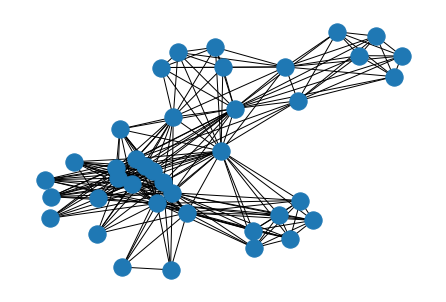

In [15]:
nx.draw(shrew_graph)

1d) The graph from 1c is not very easy to understand. Modify your nx.draw() call so that the vertex labels are included.

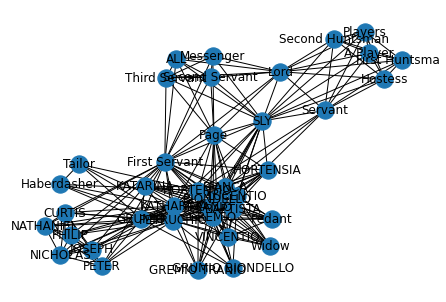

In [16]:
nx.draw(shrew_graph, with_labels=True)

1e) A further improvement we can make is to make the vertex sizes and edge thickness proportional to the "weight" of each vertex. Use your count dictionaries to add weight edge attributes and node weight attributes. Nodes (which represent characters) should be weighted according to the total number of occurrences of that character. Edges (which represent appearances in common) should have a thickness that corresponds to their weight.

1f) Look at the available settings for nx.draw(), and adjust them to try and make your graph as pretty as possible. One easy way to do this is by changing the layout - there are several canned methods in networkx for different ways of laying out the graph. We'll discuss graph drawing later in the course.

In [17]:
all_dict = character_dicts[0]

for i_dict in character_dicts[1:]:
    for key in i_dict:
        if key in all_dict:
            all_dict[key] = all_dict[key] + i_dict[key]
        else:
            all_dict[key] = i_dict[key]

In [18]:
all_dict

{'SLY': 24,
 'Hostess': 3,
 'Lord': 17,
 'First Huntsman': 4,
 'Second Huntsman': 2,
 'Servant': 2,
 'Players': 1,
 'A Player': 3,
 'First Servant': 6,
 'Second Servant': 4,
 'Third Servant': 4,
 'ALL': 1,
 'Page': 8,
 'Messenger': 1,
 'LUCENTIO': 61,
 'TRANIO': 90,
 'BAPTISTA': 68,
 'GREMIO': 57,
 'KATHARINA': 81,
 'HORTENSIO': 69,
 'HORTENSIA': 1,
 'BIANCA': 29,
 'BIONDELLO': 40,
 'PETRUCHIO': 158,
 'GRUMIO': 62,
 'GRUMIO BIONDELLO': 1,
 'GREMIO TRANIO': 1,
 'KATARINA': 1,
 'CURTIS': 20,
 'NATHANIEL': 4,
 'PHILIP': 1,
 'JOSEPH': 1,
 'NICHOLAS': 1,
 'PETER': 2,
 'Pedant': 20,
 'Haberdasher': 1,
 'Tailor': 12,
 'VINCENTIO': 23,
 'Widow': 8}

In [19]:
for key in all_dict:
    shrew_graph.nodes[key]['lines'] = all_dict[key]

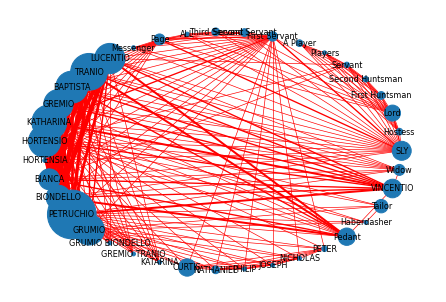

In [45]:
pos = nx.circular_layout(shrew_graph)
nx.draw(shrew_graph,
        pos = pos,
        edge_color = 'r',
        with_labels=True,
        font_size=8,
        width=[item[2]['weight'] / 3 for item in shrew_graph.edges.data()],
        node_size=[item[1]['lines'] * 15 for item in shrew_graph.nodes.data()])

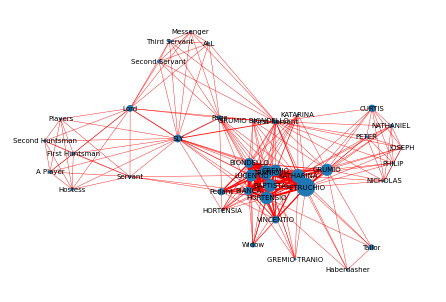

In [52]:
pos = nx.spring_layout(shrew_graph, k=0.15, iterations=20)

nx.draw(shrew_graph,
        pos = pos,
        edge_color = 'r',
        with_labels=True,
        font_size=7,
        width=[item[2]['weight'] / 5 for item in shrew_graph.edges.data()],
        node_size=[item[1]['lines'] * 2 for item in shrew_graph.nodes.data()])

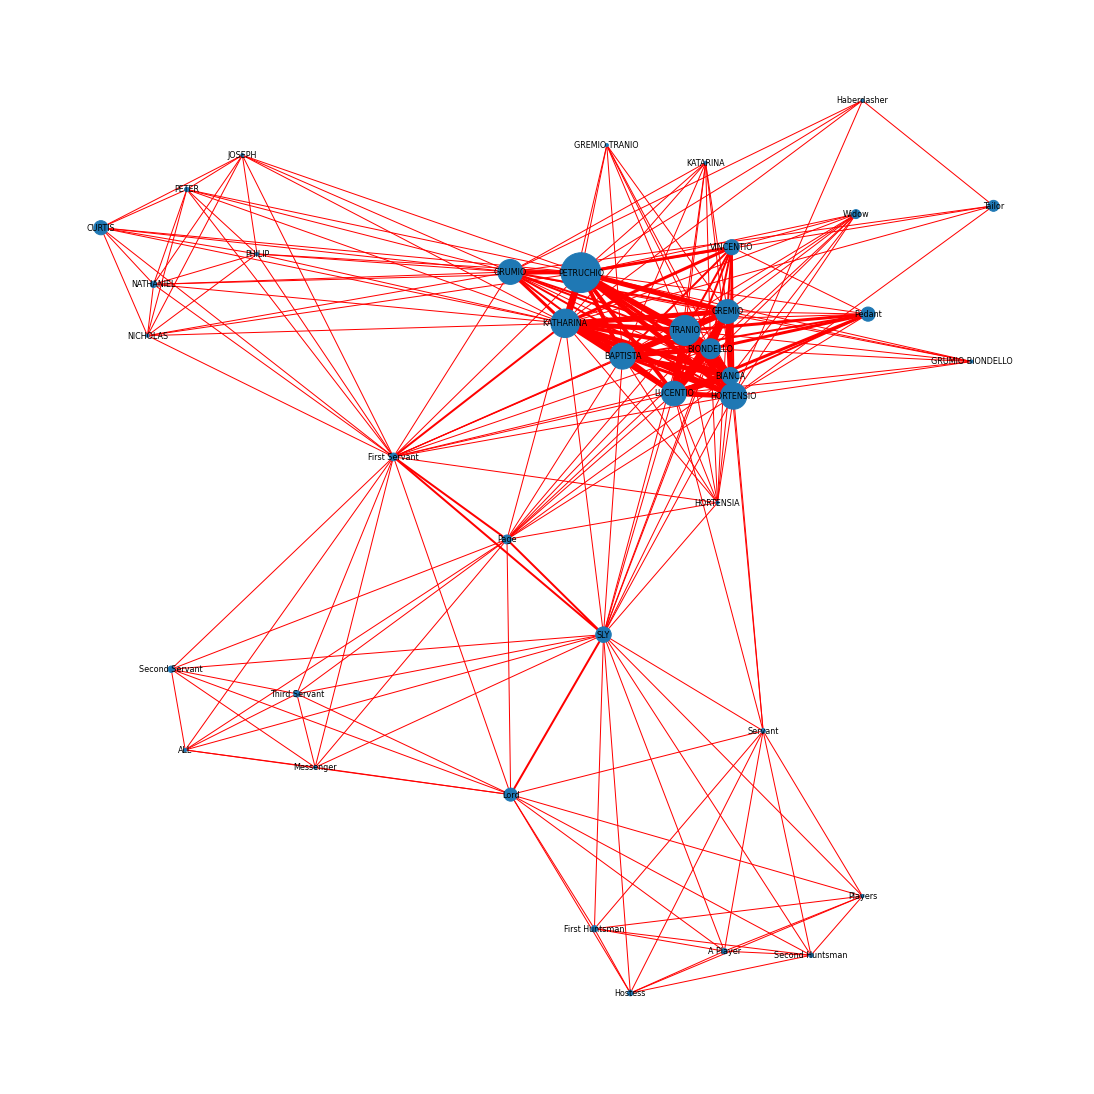

In [60]:
plt.figure(1,figsize=(15,15)) 
pos = nx.spring_layout(shrew_graph, k=0.15, iterations=20)

nx.draw(shrew_graph,
        pos = pos,
        edge_color = 'r',
        with_labels=True,
        font_size=8,
        width=[item[2]['weight'] / 2 for item in shrew_graph.edges.data()],
        node_size=[item[1]['lines'] * 10 for item in shrew_graph.nodes.data()])
plt.show()

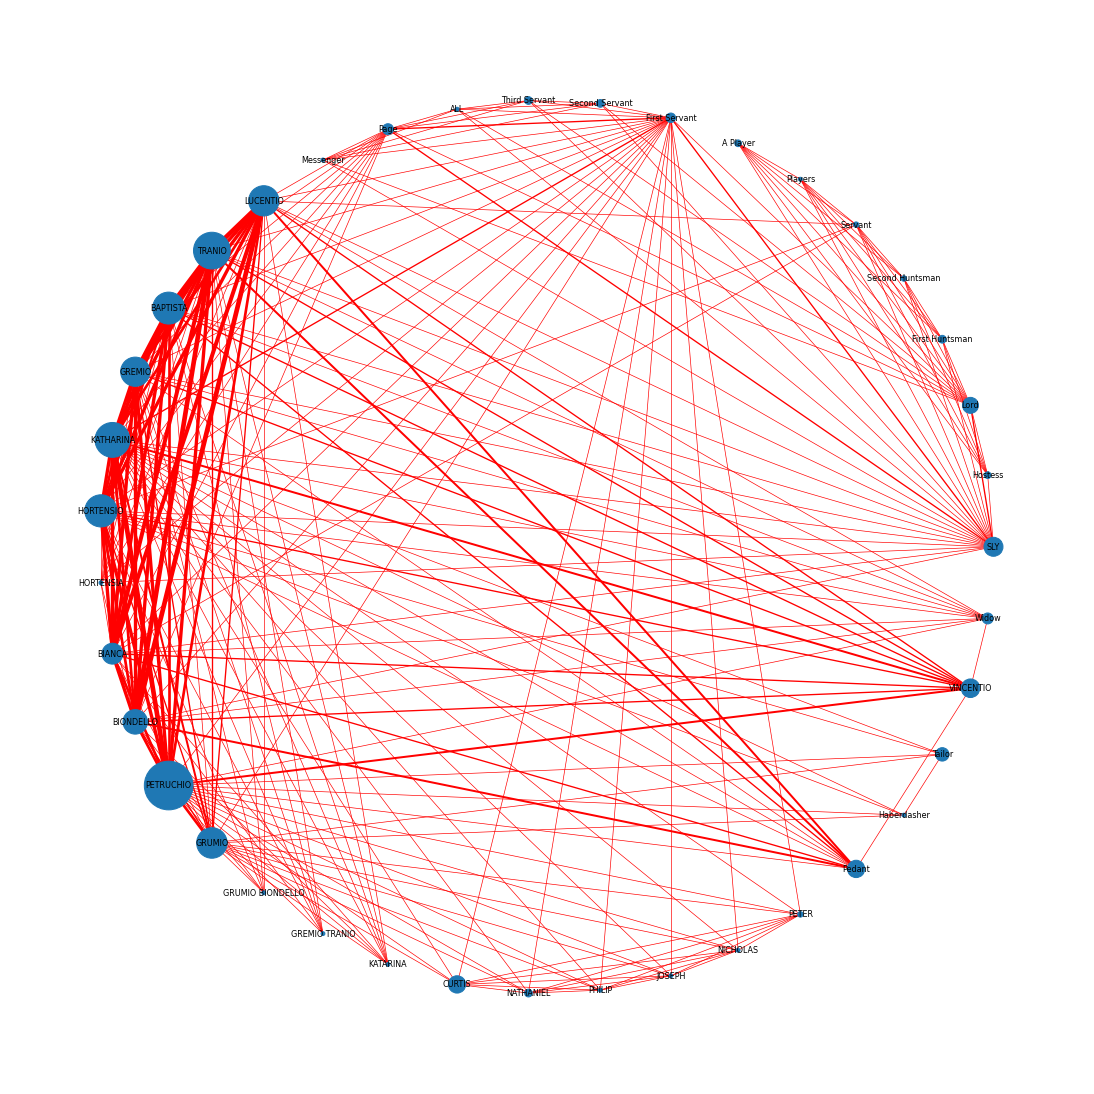

In [61]:
plt.figure(2,figsize=(15,15)) 
pos = nx.circular_layout(shrew_graph)
nx.draw(shrew_graph,
        pos = pos,
        edge_color = 'r',
        with_labels=True,
        font_size=8,
        width=[item[2]['weight'] / 3 for item in shrew_graph.edges.data()],
        node_size=[item[1]['lines'] * 15 for item in shrew_graph.nodes.data()])

I think this last example with the circular layout, drawn quite a bit larger in order to give each node some breathing room looks the best. Playing around with spring layout may look better after tweaking parameters more but the circular example is intelligible at least. Red edges make reading labels easier.